# Lab Model order selection

The goal of this lab session is to study different model order selection methods. You will send only one notebook for both parts.


We begin with the standard imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

# Disclaimer:

AIC formula given during lecture has slightly different form that the one proposed in original paper (https://sci-hub.se/https://ieeexplore.ieee.org/document/1100705) (Akaike, 1974). Eventhough that the conclusions would be the same for both of formulas, to avoid confusion we will use formula from original paper. The difference between these two formulas is that original one is scaled by factor -2 compared to the one introduced during lecture. Therefore we want to maximize the criterion given during lecture while in this lab we will try to minimize AIC. 

## Theoretical questions 

What is the expression of the AIC and BIC for a dataset $\{X_1,...X_n \}$ modeled with a GMM with $k$ mixtures after EM algorithm.

#### AIC

AIC formula based on https://en.wikipedia.org/wiki/Akaike_information_criterion and original paper
$$
\mathrm{AIC}=2 k-2 \ln (\hat{L})
$$
where $k$ is the number of estimated parameters and $\ln (\hat{L})$ is the maximum of log-likelihood function for dataset $\{X_1,...X_n \}$

In case of GMM model with $K$ $d$-dimensional components:
$$k=K-1+d K+\frac{K d(d+1)}{2}$$


where 
- K-1 comes from weights of mixture distribiution (since they sum to 1, it is enough to learn K-1)
- dK comes from K d-dimensional mean vectors
- last component of sum comes from covariance matrix (since it is symetric we only need to learn lower triangle / upper triangle with diagonal).

The log-likelihood function is equal to
$$
\ln (\hat{L})=\sum_{i=1}^{n} \log\left( \sum_{m=1}^{K} \alpha_m \phi(x_i|\mu_m,\Sigma_m)\right)
$$

where:
- $\alpha_m$ is a weight of $m$-th gaussian distribiution 
- $\mu_m$ is a mean vector of $m$-th gaussian distribiution
- $\sigma_m$ is a covariance matrix of $m$-th gaussian distribiution
- whole expression $\sum_{m=1}^{K} \alpha_m \phi(x_i|\mu_m,\Sigma_m)$ is a density estimate of a gaussian mixture model density in point $x_i$

It is worth to highlight the fact that we have coefficients $\alpha_m$ estimated thanks to EM algorithm therefore we dont have to introduce latent variables to express log-likelihood

Finally we can get AIC formula as:
$$
AIC = 2\cdot ( K-1+d K+\frac{K d(d+1)}{2} ) - 2 \cdot ( \sum_{i=1}^{n} \log\left( \sum_{m=1}^{K} \alpha_m \phi(x_i|\mu_m,\Sigma_m)\right) )
$$

#### BIC

Once again there are different approaches to calculate BIC. However the differences don't change results while comparing models as they differ by factor / sign. We will us formula cited on Wikipedia https://en.wikipedia.org/wiki/Bayesian_information_criterion.

$$
\mathrm{AIC}= k \ln(n) - 2 \cdot \ln (\hat{L})
$$

In previous cells we already calculated $\ln (\hat{L})$ a and $k$. $n$ is number of observations. Therefore the BIC formula is equal to: 
$$
BIC = \ln(n)\cdot ( K-1+d K+\frac{K d(d+1)}{2} ) - 2 \cdot ( \sum_{i=1}^{n} \log\left( \sum_{m=1}^{K} \alpha_m \phi(x_i|\mu_m,\Sigma_m)\right) )
$$

________________________________________________________________________

What is the expression of the AIC and BIC for a dataset $\mathcal{X} =\{(X_1,Y_1),...(X_n,Y_n) \}$ modeled with a Logistic Regression after its training on $\mathcal{X}$. Suppose we have 2 labels and X has p features

#### AIC

Repeating computations from Lab 3:
The likelikehood function is equal to:
$$
\hat{L}=\prod_{i=1}^n p\left(x_i\right)_i^y \cdot\left(1-p\left(x_i\right)\right)^{1-y_i}
$$
where $p\left(x_i\right)$ equals to probability that observation $x_i$ has label 1 .
$$
p\left(x_i\right)=\frac{1}{1+e^{-\left(X^1 \rho_1+\ldots X^p \rho_p\right)}}
$$
Therefore the log-likelihood is equal to:
$$
\begin{aligned}
& \ln (\hat{L})=\sum_{i=1}^n y_i \cdot \log \left(p\left(x_i\right)+y_i \cdot\left(1-y_i\right) \cdot \log \left(1-p\left(x_i\right)\right) \Longleftrightarrow\right. \\
& \ln (\hat{L})=\sum_{i=1}^n y_i \cdot \langle X^i,\beta \rangle + \log(\frac{1}{1+e^{\langle X^i,\beta \rangle}})
\end{aligned}
$$
where
- $X^i$ is a $i^{t h}$ observation therefore vector of size $(1, p), p$-number of features.
- $\beta$ is a vector of model parameters of size $(1, p)$
- $n$ is a number of observations


Number of estimated parameters is equal to:
$$
k = p = \text{ size of } \beta
$$

Finally we can get AIC formula as:
$$
AIC = 2 \cdot p - 2 \cdot \sum_{i=1}^n y_i \cdot \langle X^i,\beta \rangle + \log(\frac{1}{1+e^{\langle X^i,\beta \rangle}})
$$

#### BIC

In previous cells we already calculated $\ln (\hat{L})$ a and $k$. $n$ is number of observations. Therefore the BIC formula cited before and substituted with these values is equal to: 
$$
BIC = \ln(n) \cdot p - 2 \cdot \sum_{i=1}^n y_i \cdot \langle X^i,\beta \rangle + \log(\frac{1}{1+e^{\langle X^i,\beta \rangle}})
$$

________________________________________________________________________

#### Explain briefly the concept of K-fold cross validation. 

K-fold cross validation is a method that divides the learning set into k equal in size, disjoint subsets, of which k-1 are used for model learning/adaptation and 1 subset is used for model validation. It is used to determine the quality of the model in order to eliminate the problem of overfitting. Each of subsets, one by one, is taken as a test set and the others together as a training set. After training the analysis is performed on the test set (the analysis is thus performed k times). The k results obtained are combined (e.g. averaged) to produce a single result. E.g in order to obtain estimation of accuracy of a model on unseen data we can't train it on whole data and compute accuracy as whole dataset was used in training, therefore estimation of accuracy will be likely higher than in reality. We perform cross validation so, train model k times using 1-1/k % observations and evalutae accuracy on data not used in training. We obtain k accuracies on unseen data that can be later analyised by looking at e.g average or average+standard deviation.

## Application AIC/BIC

You are going apply the criterias on several datasets.

## Clustering

AIC and BIC can help to estimate the number of clusters when EM algorithm is used (because it's a probabilistic model.) 


In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
from sklearn.mixture import GaussianMixture

### Task : 
- Apply GaussianMixture model using different number of mixture. 
- Choose the number of mixtures with the BIC/AIC.

Use the .bic(X) and the .aic(X) method already implemented in sklearn

In [5]:
k_max = 50
bics = []
aics = []
for k in range(1,k_max):
    aics.append(-GaussianMixture(n_components=k, random_state=0).fit(X).aic(X)) 
    # we take minus bic value according to https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html
    # we can tak plus value and maximize it but we want to follow bic introduced in theoretical questions
    bics.append(-GaussianMixture(n_components=k, random_state=0).fit(X).bic(X))

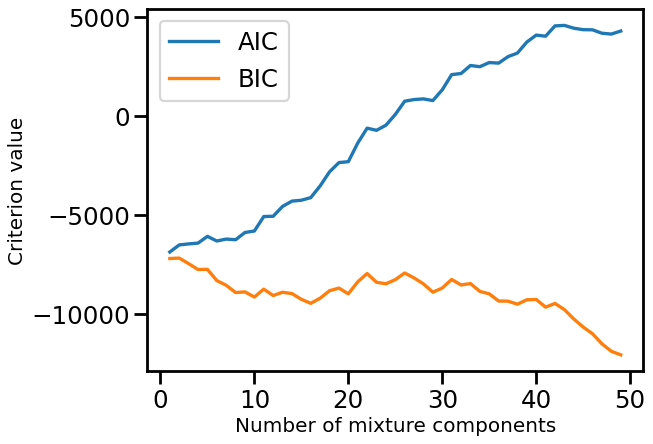

In [6]:
figure(figsize=(8, 6), dpi=80)
plt.plot(range(1,k_max), aics, label = "AIC")
plt.plot(range(1,k_max), bics, label = "BIC")
plt.xlabel('Number of mixture components', fontsize=18)
plt.ylabel('Criterion value', fontsize=18)
plt.legend()
plt.show()

In [7]:
print(f"Lowest AIC is obtained for k equal to {aics.index(min(aics))+1}")
print(f"Lowest BIC is obtained for k equal to {bics.index(min(bics))+1}")

Lowest AIC is obtained for k equal to 1
Lowest BIC is obtained for k equal to 49


Therefore it is reasonable to choose $k=1$ based on AIC or $k$ equal to 49 according to BIC

## Classification

### Tasks : 
- Train logistic regression model on the dataset
- Compute AIC for this dataset


In [8]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target
from sklearn.linear_model import LogisticRegression

In [9]:
#Need to use different solver than default one so convergence is obtained
clf = LogisticRegression(random_state=0,
                         solver="newton-cg",
                         max_iter=1000).fit(X, y)

In [10]:
from sklearn.metrics import log_loss
from math import log

# computing AIC by hand accroding to formula given here:
# https://en.wikipedia.org/wiki/Akaike_information_criterion
# computing BIC by hand accroding to formula given here:
# https://en.wikipedia.org/wiki/Bayesian_information_criterion
# formulas differ from ones given in lecture by factor = 2 - however conclusions will be the same

def AIC(fitted_model,X,y):
    y_pred = fitted_model.predict_proba(X)
    k = len(fitted_model.coef_.flatten())
    AIC = -2 * log_loss(y,y_pred) + 2 * k 
    return AIC

def BIC(fitted_model,X,y):
    y_pred = fitted_model.predict_proba(X)
    k = len(fitted_model.coef_.flatten())
    BIC = -2 * log_loss(y,y_pred) + k * y.size 
    return BIC

print(f"AIC for current model : {AIC(clf,X,y)}")
print(f"BIC for current model : {BIC(clf,X,y)}")

AIC for current model : 77.92820510463353
BIC for current model : 6941.928205104634


### Does it seem to be reasonable to add a polynomial kernel as regards AIC or BIC ? 

In [11]:
from sklearn.preprocessing import PolynomialFeatures

#possible polynomial order
p_max = 5
aics_lr = []
bics_lr = []
for k in range(1,p_max):
    poly = PolynomialFeatures(k) #degree of kernel, when k = 1 - there is no transformation
    X_transformed = poly.fit_transform(X) 
    clf_kernel = LogisticRegression(random_state=0,
                             solver="lbfgs",
                             max_iter=10000).fit(X_transformed, y)
    aics_lr.append(AIC(clf_kernel,X_transformed,y))
    bics_lr.append(BIC(clf_kernel,X_transformed,y))

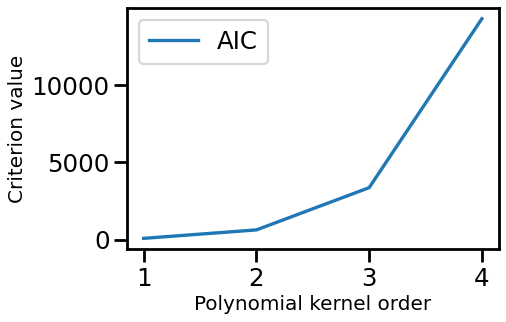

In [12]:
figure(figsize=(6, 4), dpi=80)
plt.plot(range(1,p_max), aics_lr, label = "AIC")
plt.xlabel('Polynomial kernel order', fontsize=18)
plt.ylabel('Criterion value', fontsize=18)
plt.legend()
plt.show()

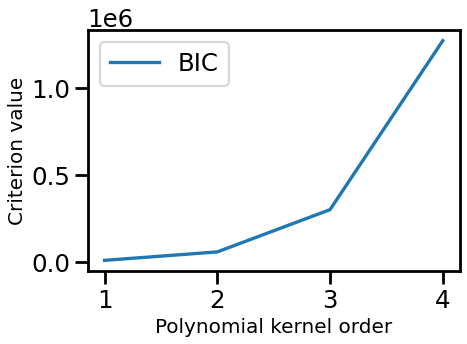

In [13]:
figure(figsize=(6, 4), dpi=80)
plt.plot(range(1,p_max), bics_lr, label = "BIC")
plt.xlabel('Polynomial kernel order', fontsize=18)
plt.ylabel('Criterion value', fontsize=18)
plt.legend()
plt.show()

Both criterions - AIC and BIC - has lowest value for kernel order 1, therefore it is not reasonable to add a polynomial kernel to the model

### What would the AIC be for LDA model assuming we have the same likelihood than the previous logistic regression ? 

In [96]:
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Number of parameters in Logistic regression without kernel : {len(clf.coef_.flatten())}")

Number of features: 13
Number of classes: 3
Number of parameters in Logistic regression without kernel : 39


AIC formula based on https://en.wikipedia.org/wiki/Akaike_information_criterion
$$
\mathrm{AIC}=2 k-2 \ln (\hat{L})
$$

For LDA, $(p+1)$ parameters are needed to construct the discriminant function - where $p$ is the number of features. For a problem with $K$ classes, we would only need $(K-1)$ such discriminant functions by arbitrarily choosing one class to be the base class (subtracting the base class likelihood from all other classes). Hence, the total number of estimated parameters for LDA is $(K-1)(p+1)$. In our case this is equal to $14 \cdot 2 = 28$. While in Logistic regression without kernel it was $39$. Therefore AIC would be smaller in decribed scenario for LDA. 

AIC/BIC and cross-validation are mostly used with linear Regression and logisitic regression. AIC/BIC rely on probabilistic caracterics of models in order to compute loglikelihood. 

Whereas crossvalidation can be applied in every models and give a more realistic vision of the performance of the model.


## Real Machine Learning situation

Imagine you want to develop and deploy for your job a machine learning algorithm capable of recognizing digits, in order to read automatically bank cheques or bills. 
The goal of the development phase for a data scientist is to choose the best performing model and also evaluate the most accurately the generalisation error on unseen data i.e the error the algorithm will produce when it will be operational. 
For instance in our case, an error from your algorithm will cost a certain amount of money, it's mandatory to estimate the potential financial loss induced by your model. 



In [14]:
from sklearn.datasets import load_digits
digits = load_digits()

X=digits.data
y=digits.target

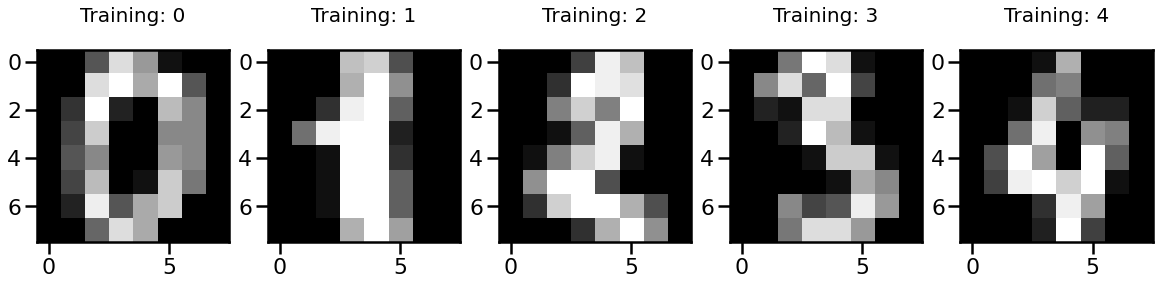

In [15]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### Choose a model with Cross validation 
Cross validation provides a better estimation of the model's performance on the dataset than split train/test method. It's very useful for selecting the most accurate model. 


In [16]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.svm import SVC

### Tasks : 
- Apply cross validation to Logistic Regression and SVM, choose a C between 0.01 and 1 to add regularization
- Choose the best performing model

In [17]:
# Doing cross validation on Logistic Regression
# possible Cs
C_space = np.linspace(0.05,1,20)
avg_accuracy_lr = []

for c in C_space:
    model = LogisticRegression(C = c,
                               solver="newton-cg")
    cv_result = cross_validate(estimator = model,
                               scoring = "accuracy",
                               X = X,
                               y = y,
                               cv = 5)
    avg_accuracy_lr.append(cv_result['test_score'].mean())

In [18]:
# Doing cross validation on SVM
# possible Cs
C_space = np.linspace(0.05,1,20)
avg_accuracy_SVM = []

for c in C_space:
    model = SVC(C = c)
    cv_result = cross_validate(estimator = model,
                               scoring = "accuracy",
                               X = X,
                               y = y,
                               cv = 5)
    avg_accuracy_SVM.append(cv_result['test_score'].mean())

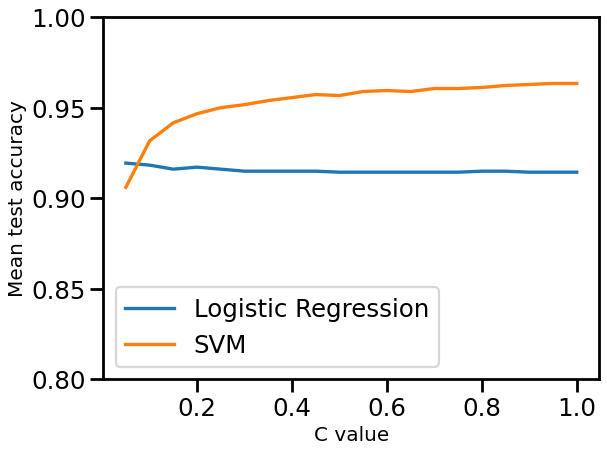

Highest accuracy for SVM is obtained for C = 0.95


In [19]:
figure(figsize=(8, 6), dpi=80)
plt.plot(C_space, avg_accuracy_lr, label = "Logistic Regression")
plt.plot(C_space, avg_accuracy_SVM, label = "SVM")
plt.xlabel('C value', fontsize=18)
plt.ylabel('Mean test accuracy', fontsize=18)
plt.legend(loc = 3)
plt.ylim([.8, 1])
plt.show()

max_value = max(avg_accuracy_SVM)
index = avg_accuracy_SVM.index(max_value)
print(f"Highest accuracy for SVM is obtained for C = {C_space[index]}")

Highest mean accuracy using 5-fold cross validation is obtained for SVM model for C = 0.95. Therefore we can hypothesized that from considered models this is the best one.

### Estimation of the generalization error

As we have choosen our model, we have to evaluate its future performance on unseen data. The most easy way is to use the split train/test method to have a confidence interval based on the performance of the model on the test dataset.

One could want to use cross validation for doing this estimation, however the several estimations returned by k fold cross-val don't garentee the independance of the estimations. The independence is needed for confidence intervals. This is why randomized split train/test is used.

### Tasks : 
- Split the dataset 50%/50% and fix the random state of the split_train_test
- Return the test accuracy with the choosen model

In [118]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
C = C_space[index]
model = SVC(C = C).fit(X = X_train,
                       y = y_train)

# calculating test accuracy
y_pred = model.predict(X_test)
p = accuracy_score(y_pred,y_test)
print(f"Accuracy score on test set : {p:.4f}")

Accuracy score on test set : 0.9878



### Confidence intervals
Assume that the event to have a right classification with our model follows a bernouilli process with paramater p. 
The accuracy on the test dataset ($\hat{p}$) gives us an estimation of p. 



### Task : Make a 99% confidence interval of the real accuracy using Central limit theorem

Let $X_1, X_2, ... X_n$ be a sequence of i.i.d. random variables that follow bernoulli distribiution with parameter $p$. Then $\mathbb {E} [X_{i}]=p$ and $\operatorname {Var} [X_{i}]=\sigma ^{2} = p(1-p)<\infty$. Each random variable represents an
event, that if observation $i$ has a right classification with our model it equals to 1, and 0 otherwise. Therefore by central limit theorem as $n$ goes to infinity the empirical mean:
$$
\hat{p}=\bar{X}_n \equiv \frac{X_1+\cdots+X_n}{n}
$$
converges in distribiution to $\mathcal{N}\left(p, \frac{\sigma^2}{n}\right)$. In other words:
$$
Z=\frac{\hat{p}-p}{\sqrt{\hat{p}(1-\hat{p})} / \sqrt{n}} \sim N(0,1)
$$

We can find 99% confidence interval by finding $t$ s.t
$$
\mathbb{P}(|Z|<t)=99\%
$$
and by looking at
$$
\mathbb{P}(\hat{p}-t\cdot\sqrt{\hat{p}(1-\hat{p})} / \sqrt{n}< p <\hat{p} + t \cdot \sqrt{\hat{p}(1-\hat{p})} / \sqrt{n})=99\%
$$

In [119]:
from scipy.stats import norm
alpha = 0.01
t = norm.ppf(1-alpha/2)
n = y_test.size

print(f"Lower bound of interval {p-t*(p*(1-p)/n)**(1/2)}")
print(f"Upper bound of interval {p+t*(p*(1-p)/n)**(1/2)}")

Lower bound of interval 0.9783196520553554
Upper bound of interval 0.9972087127944778


### Hoeffding inequality 

A non negligeable inequality for constituting confidence interval for large dataset is Hoeffding inequality which is often tighter than CLT inequality for very large dataset (our dataset is maybe not large enough)

Hoeffding’s inequality: Suppose that $\{Z_1, . . . , Z_n\}$ are independent and that, $a ≤ Z_i ≤ b$, and $E[Z_i]=z$. Then for any $t>0$,

$$ P(|\hat{Z} - z|\ge t) \le 2\exp \left(-\frac{2nt^2}{(b-a)^2} \right)$$ 
With $\hat{Z} = \frac{1}{n} \sum_{i=1}^n Z_i $

Apply this inequality to the test accuracy $\hat{p}$ in order to have a 99% confidence interval


Above inequality was corrected based on 

https://en.wikipedia.org/wiki/Hoeffding%27s_inequality

If we let $X_1, \ldots, X_n \stackrel{\text { i.i.d. }}{\sim}$ Bernoulli $(p)$, then since $X_i \in[0,1]$ for each $i$ Hoeffding's inequality says that
$$
P(|\bar{X}-p| \geq t) \leq 2 e^{-2 n t^2}
$$
or
$$
P(|\bar{X}-p|<t) \geq 1-2 e^{-2 n t^2} .
$$
If we want a $99 \%$ confidence interval , we can equate the right hand side to $0.99$ and solve for $t$ to get
$$
t=\sqrt{-\frac{1}{2 n} \log (\frac{0.01}{2})} .
$$
Rewriting the inequality above after plugging in this value of $t$ we have
$$
P\left(\bar{X}-\sqrt{-\frac{1}{2 n} \log (\frac{0.01}{2})}<p<\bar{X}+\sqrt{-\frac{1}{2 n} \log (\frac{0.01}{2})}\right) \geq 0.99
$$
and so these values can be the endpoints of a $\mathbf{99 \%}$ confidence interval for $p$.


In [120]:
import math   

alpha = 0.01
n = y_test.size
const = (-1/(2*n) * math.log(alpha/2)) ** (1/2)

print(f"Lower bound of interval {p-const}")
print(f"Upper bound of interval {p+const}")

Lower bound of interval 0.9334798950816839
Upper bound of interval 1.0420484697681491


Of course $p$ can not be higher than $1$ so final endpoints are $\approx0.93$ and $1$. This results in wider interval that for interval obtained from CLT which probably comes from fact that dataset size is not big enough. 